<a href="https://colab.research.google.com/github/VeronikaShe/ML-study_HW_TimeSeries/blob/main/%D0%94%D0%97_%D1%81%D1%82%D0%B0%D1%86%D0%B8%D0%BE%D0%BD%D0%B0%D1%80%D0%BD%D1%8B%D0%B5_%D1%80%D1%8F%D0%B4%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
sales_of_company_x = pd.read_csv("https://raw.githubusercontent.com/VeronikaShe/ML-study_HW_TimeSeries/refs/heads/main/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("https://raw.githubusercontent.com/VeronikaShe/ML-study_HW_TimeSeries/refs/heads/main/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("https://raw.githubusercontent.com/VeronikaShe/ML-study_HW_TimeSeries/refs/heads/main/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("https://raw.githubusercontent.com/VeronikaShe/ML-study_HW_TimeSeries/refs/heads/main/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("https://raw.githubusercontent.com/VeronikaShe/ML-study_HW_TimeSeries/refs/heads/main/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("https://raw.githubusercontent.com/VeronikaShe/ML-study_HW_TimeSeries/refs/heads/main/daily-total-female-births-in-cal.csv")

# Отображение графика

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

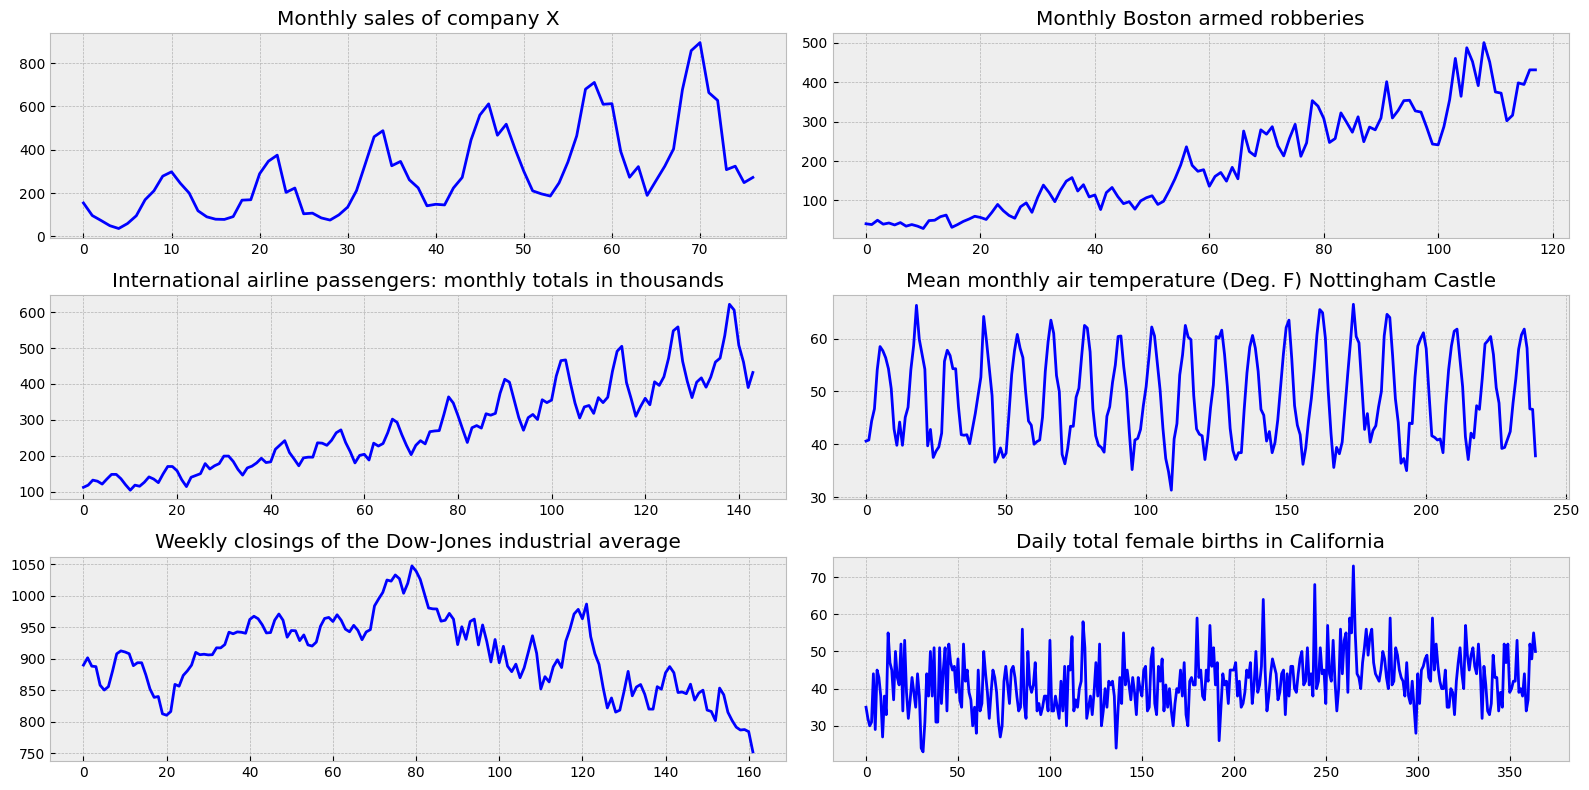

In [ ]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)

        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)

    plt.tight_layout()

# Нормализуем дисперсию

In [ ]:
from scipy.stats import boxcox

In [ ]:
series = boxcox(all_series["International airline passengers: monthly totals in thousands"], 0)

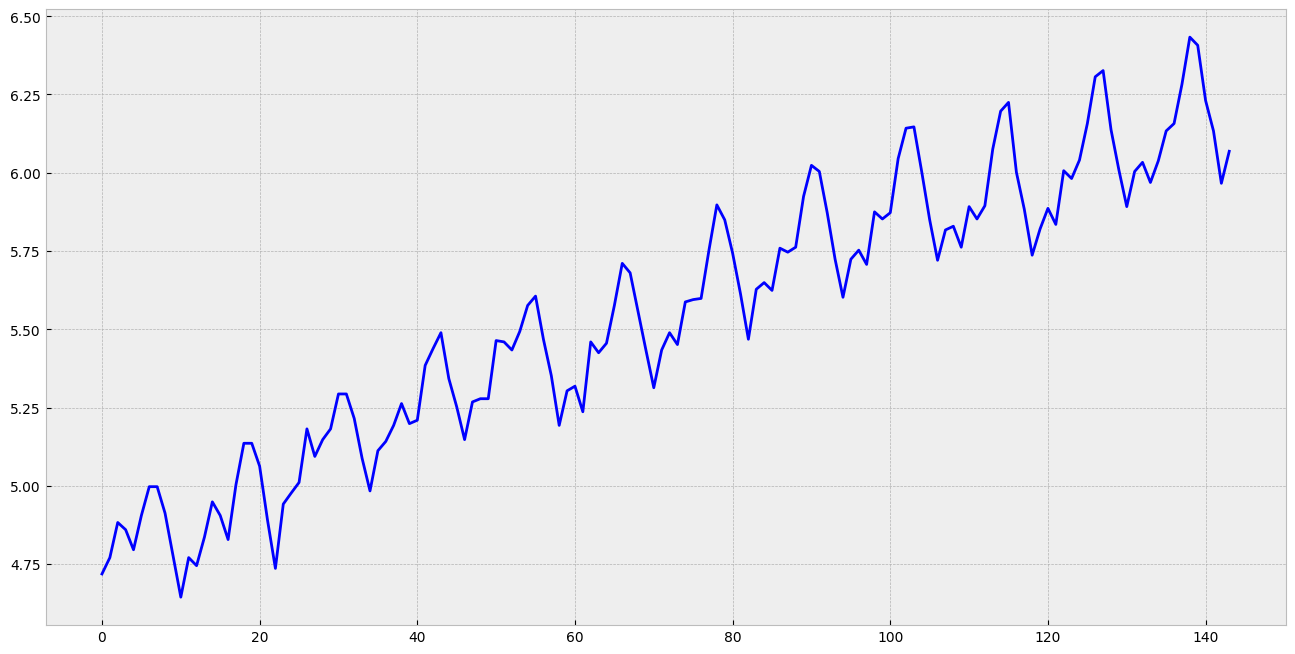

In [ ]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series, color='blue')

# Дифференцируем

In [ ]:
import numpy as np

In [ ]:
series = np.diff(series, 1)

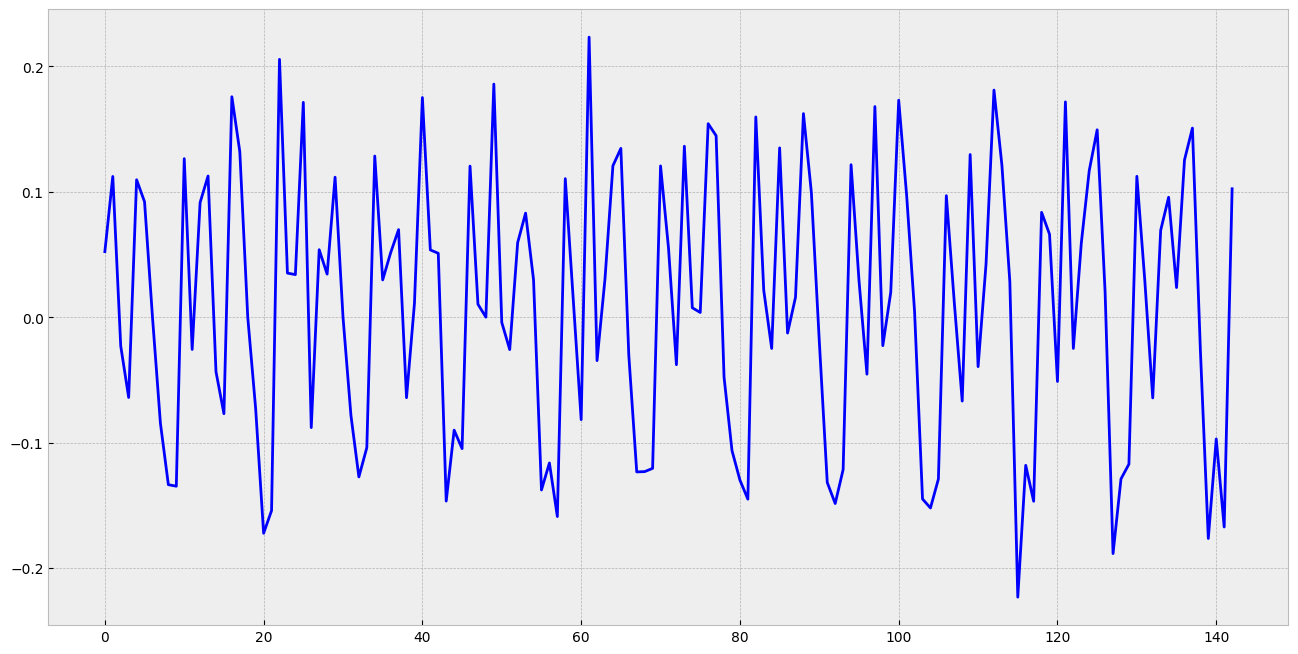

In [ ]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series, color='blue')

# Тест Дики-Фуллера

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
################
 # Dickey-Fuller
##################
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [ ]:
test_stationarity(series)

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [ ]:
test_stationarity(all_series["International airline passengers: monthly totals in thousands"])

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


# Коррелограммы

In [ ]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [ ]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

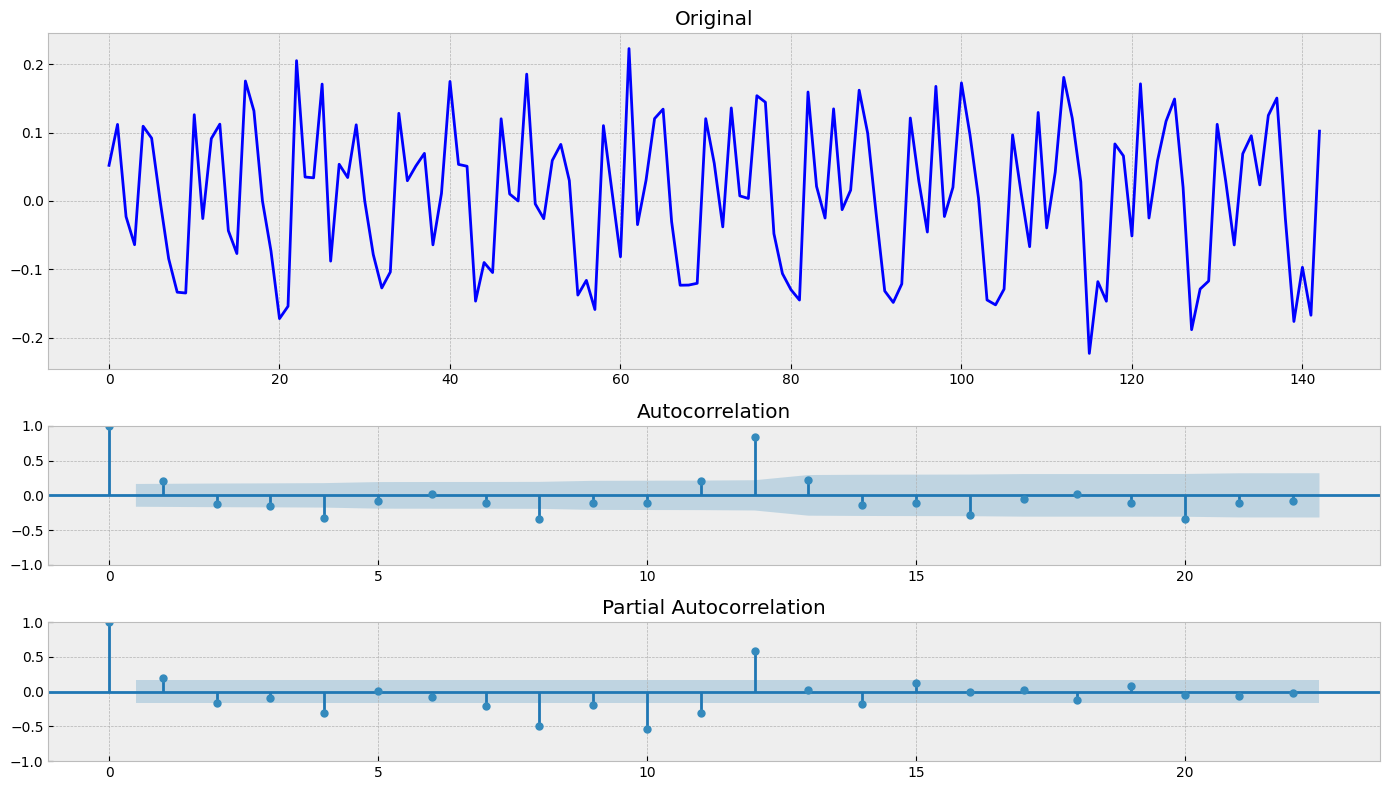

In [ ]:
tsplot(series)

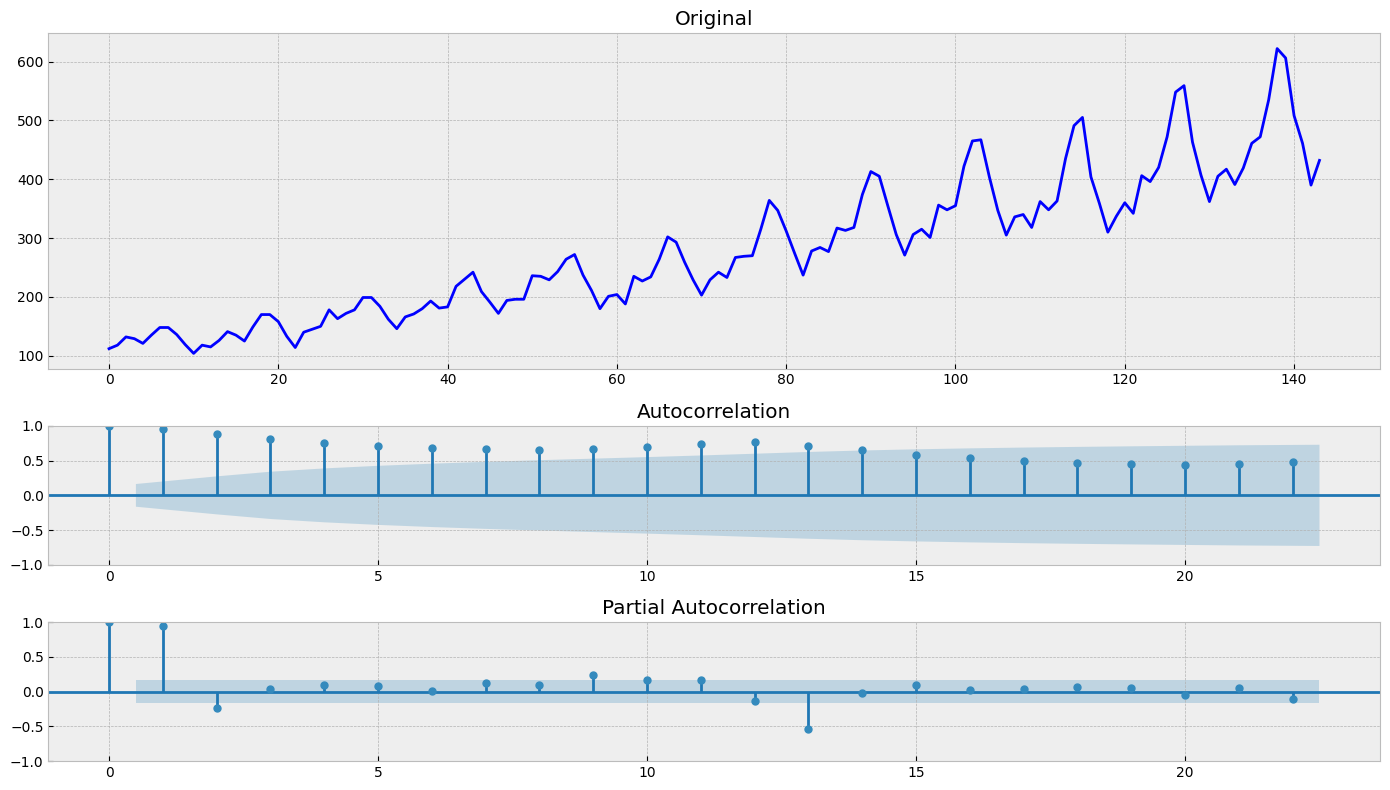

In [ ]:
tsplot(all_series["International airline passengers: monthly totals in thousands"])

In [ ]:
differenced_births_series = np.diff(transformed_births_series, 1)

## Monthly sales of company X


In [ ]:
transformed_series = boxcox(all_series["Monthly sales of company X"], 0)

In [ ]:
differenced_series = np.diff(transformed_series, 1)

In [ ]:
test_stationarity(differenced_series)

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


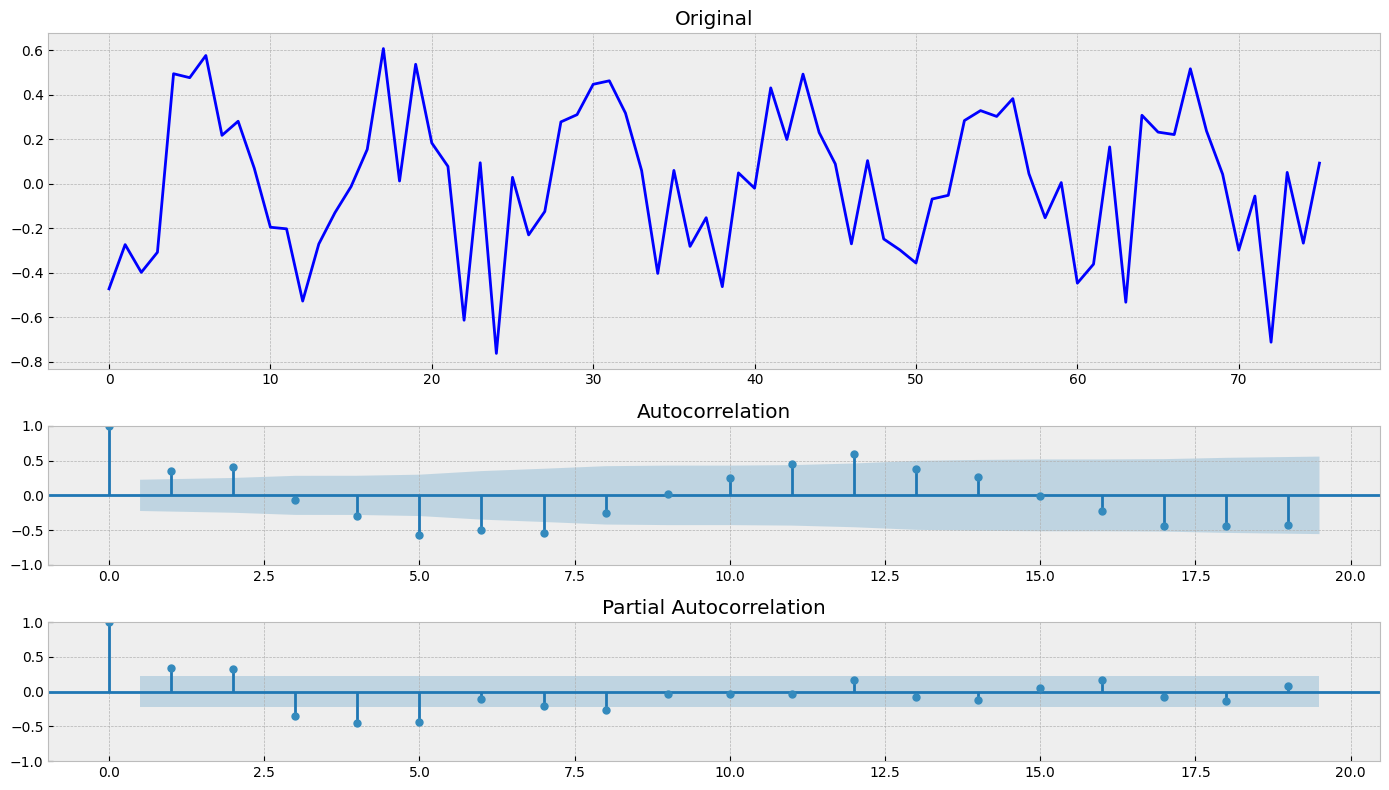

In [ ]:
tsplot(differenced_series)

## Monthly Boston armed robberies


In [ ]:
transformed_robberies_series = boxcox(all_series["Monthly Boston armed robberies"], 0)

In [ ]:
differenced_robberies_series = np.diff(transformed_robberies_series, 1)

In [ ]:
test_stationarity(differenced_robberies_series)

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


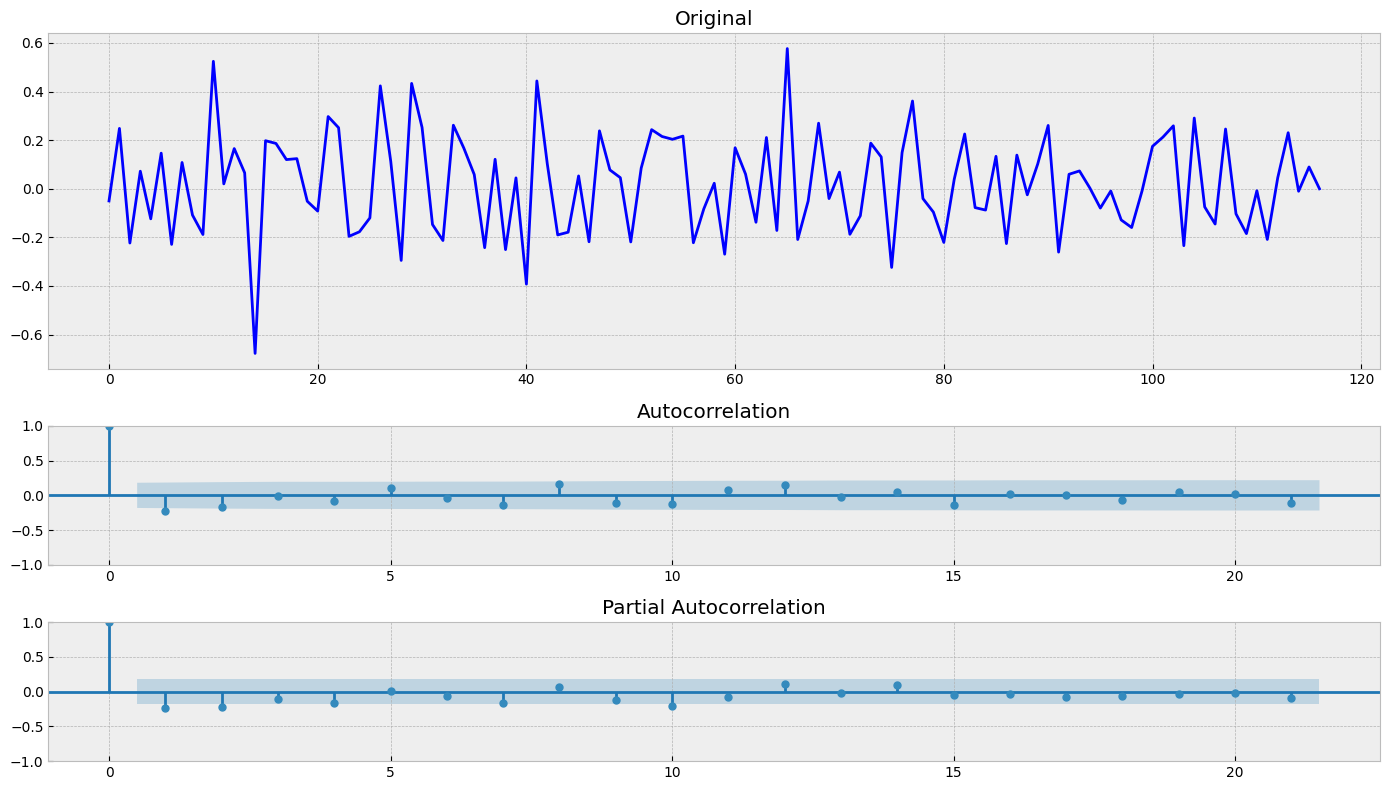

In [ ]:
tsplot(differenced_robberies_series)

## Mean monthly air temperature


In [ ]:
transformed_temp_series = boxcox(all_series["Mean monthly air temperature (Deg. F) Nottingham Castle"], 0)

In [ ]:
differenced_temp_series = np.diff(transformed_temp_series, 1)

In [ ]:
test_stationarity(differenced_temp_series)

Results of Dickey-Fuller Test:
Test Statistic                -1.214226e+01
p-value                        1.640728e-22
#Lags Used                     1.100000e+01
Number of Observations Used    2.270000e+02
Critical Value (1%)           -3.459490e+00
Critical Value (5%)           -2.874358e+00
Critical Value (10%)          -2.573602e+00
dtype: float64


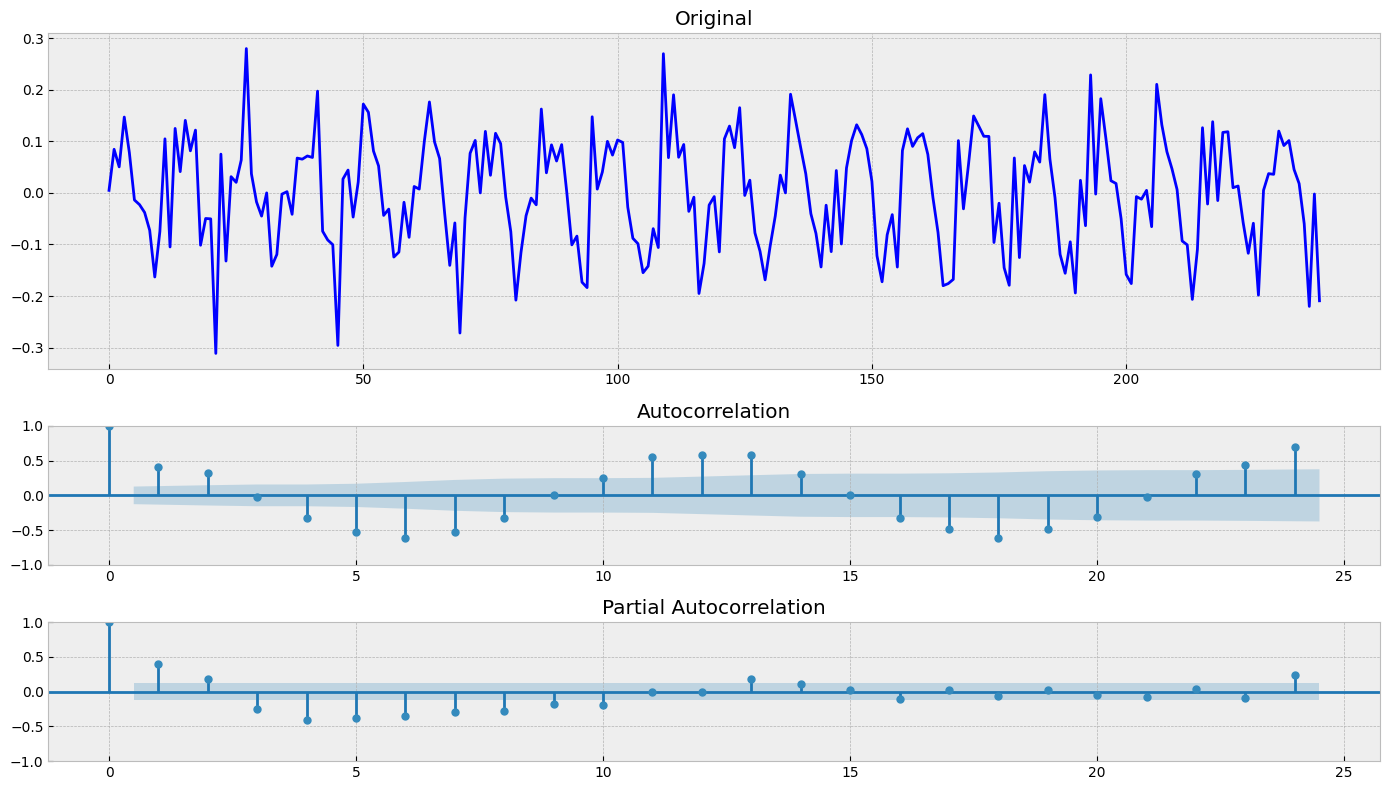

In [ ]:
tsplot(differenced_temp_series)

## Weekly closings of the Dow-Jones


In [ ]:
transformed_dowjones_series = boxcox(all_series["Weekly closings of the Dow-Jones industrial average"], 0)

In [ ]:
differenced_dowjones_series = np.diff(transformed_dowjones_series, 1)

In [ ]:
test_stationarity(differenced_dowjones_series)

Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


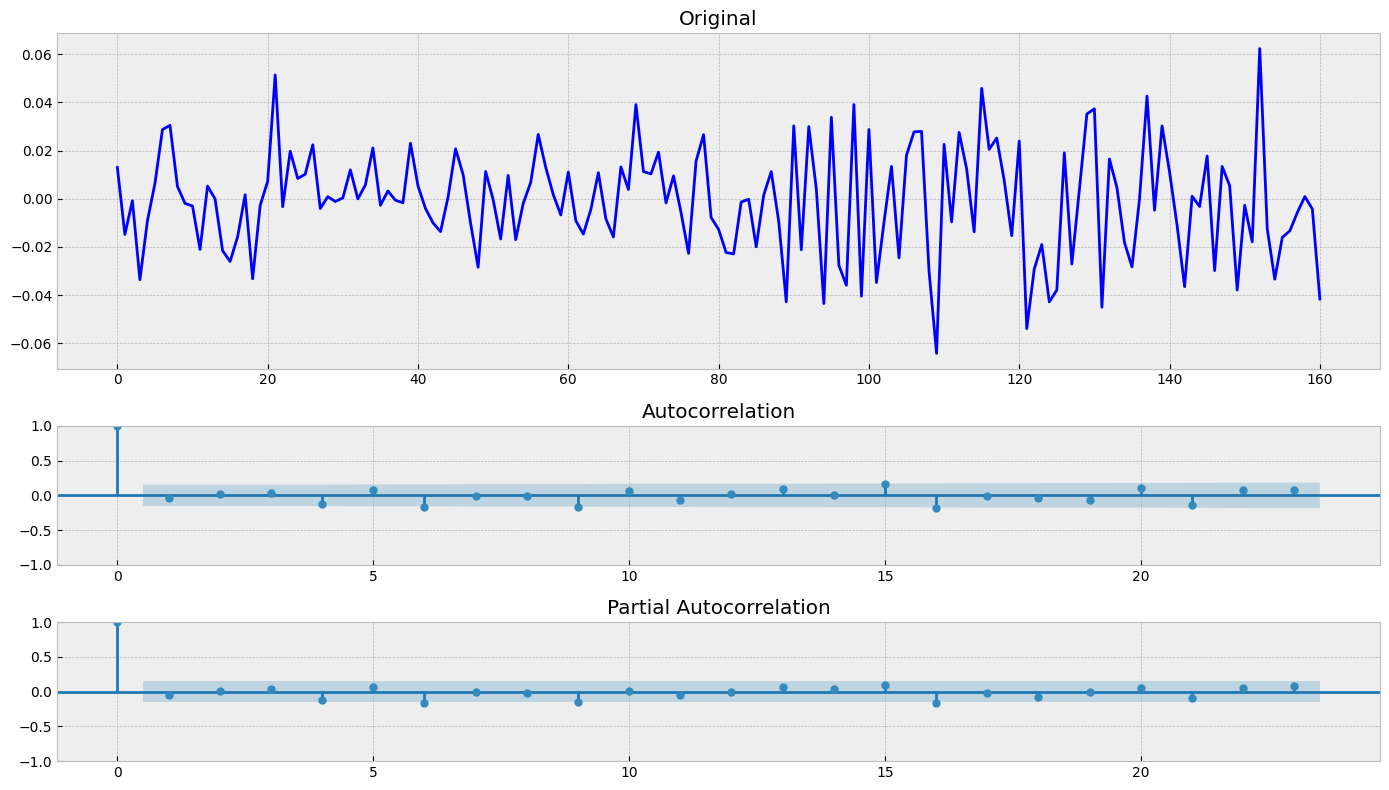

In [ ]:
tsplot(differenced_dowjones_series)

## Daily total female births in California

In [ ]:
transformed_births_series = boxcox(all_series["Daily total female births in California"], 0)

In [ ]:
differenced_births_series = np.diff(transformed_births_series, 1)

In [ ]:
test_stationarity(differenced_births_series)

Results of Dickey-Fuller Test:
Test Statistic                -1.296334e+01
p-value                        3.191205e-24
#Lags Used                     6.000000e+00
Number of Observations Used    3.570000e+02
Critical Value (1%)           -3.448801e+00
Critical Value (5%)           -2.869670e+00
Critical Value (10%)          -2.571101e+00
dtype: float64


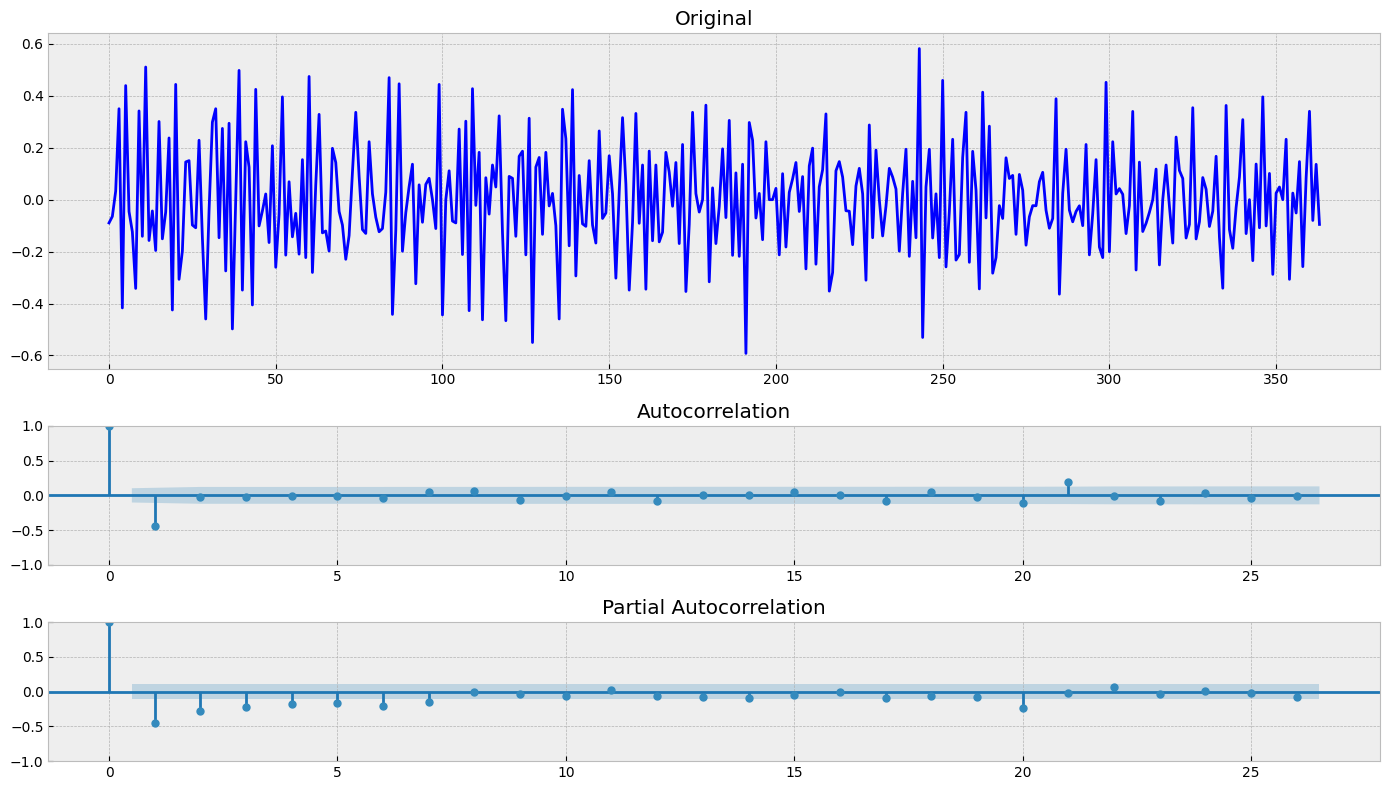

In [ ]:
tsplot(differenced_births_series)